# Case Background & Key Questions	

Flatiron Health Insurance (FHI) is a growing private healthcare insurance provider founded on the premise that using data and analytics can improve the health insurance industry by providing better care and offerings to its patients. Every year, the Center for Disease Control (CDC) conducts surveys to understand the latest demographic, health, and fitness trends. You have been tasked with analyzing the recently published results of his years’ survey and providing your recommendations back to the Chief Analytics Officer and Chief Marketing Officer. You have been assigned the task of taking a first look at the data and beginning to answer several key questions:
											 								
1)  How does health status, represented by average number of days with bad physical health in the past month (PHYSHLTH), differ by state? Also provide an indication of distribution using whatever statistics you find suitable.
 												 								
2)  Digging deeper into the data, what are some factors that impact health (i.e. demographics, behaviors, previous illness, etc.)?	
						 						
To get you started, the IT department formatted the data set into a tab delimited text file for only NY, NJ, and CT (FHI’s primary markets) called `case_studey.csv`. Below you will find a list of steps/questions that you will need to take in your investigation. The first part of the notebook will be focused on cleaning up your data and vidualizing it.  The second part of the data set will be focused on performing statistical tests to make statements with statistical significance.  


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
from scipy import stats

In [7]:
t_crit= np.round(stats.t.ppf(.95, df=7),3) #to find the T critical value, and round to 3 significant digits
t_crit

1.895

# pd.read_csv('case_study.csv')

In [2]:
#Load our dataframe account for the index columns
df = pd.read_csv('case_study.csv', index_col=0)

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (171) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.sample(1)

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
278667,34.0,7.0,8152017,8,15,2017,1100.0,2017005388,2.017005e+09,1.0,...,2.0,2.0,2.0,4.0,2.0,1.0,2.0,NaN,NaN,2.0


In [4]:
# Quickly check to see the size of our DF, both rows and columns
df.shape

(34545, 358)

## Subset your dataframe to only include the states in the tri-state area (NJ, CT, NY)

In [5]:
# your code here
df[df['_STATE'].isin([9, 34, 36])]

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
49938,9.0,5.0,5172017,5,17,2017,1200.0,2017000001,2.017000e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
49939,9.0,2.0,2142017,2,14,2017,1200.0,2017000002,2.017000e+09,NaN,...,1.0,1.0,1.0,1.0,1.0,2.0,2.0,NaN,NaN,2.0
49940,9.0,1.0,1292017,1,29,2017,1200.0,2017000003,2.017000e+09,NaN,...,3.0,2.0,1.0,3.0,2.0,1.0,1.0,NaN,NaN,2.0
49941,9.0,7.0,9112017,9,11,2017,1200.0,2017000004,2.017000e+09,NaN,...,2.0,2.0,2.0,2.0,2.0,1.0,1.0,NaN,NaN,1.0
49942,9.0,5.0,7182017,7,18,2017,1200.0,2017000005,2.017000e+09,NaN,...,2.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303774,36.0,5.0,5152017,5,15,2017,1200.0,2017012245,2.017012e+09,NaN,...,3.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
303775,36.0,6.0,6252017,6,25,2017,1200.0,2017012246,2.017012e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
303776,36.0,7.0,7212017,7,21,2017,1200.0,2017012247,2.017012e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
303777,36.0,7.0,7202017,7,20,2017,1200.0,2017012248,2.017012e+09,NaN,...,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0


Now check to see how large our subset df.

In [6]:
# your code here
df.shape

(34545, 358)

In [7]:
df['_STATE'].unique()

array([ 9., 34., 36.])

**PHYSHLTH** is the column we are interested in for this analysis, so let's start to investigate the column. Since we have a data cookbook, a.k.a. data dictionary) we want to start there before looking at the code.

In [8]:
df['PHYSHLTH'].describe()

count    34545.000000
mean        60.213403
std         37.504566
min          1.000000
25%         15.000000
50%         88.000000
75%         88.000000
max         99.000000
Name: PHYSHLTH, dtype: float64

## 1. Handle the non-normal values

As you can see from the data dictionary, there are a number of responses that are coded with values that could throw off our descriptive statistics.  Let's clean up by mapping the responses to a more appropriate value, and handling any missing values.  

In [9]:
#your code here
replace_physhlth = {77:np.nan, 88:0, 99:np.nan}
df['PHYSHLTH'] = df['PHYSHLTH'].replace(replace_physhlth)

In [10]:
df.dropna(subset=['PHYSHLTH'], inplace= True)

In [11]:
df.shape

(33747, 358)

## 2. Generate the descriptive statistics

Now that our target variable is cleaned up lets calculate the descriptive statistics, generate a graph that quickly shows those statistics, and generate a graph shows the distribution of the data.

In [12]:
# descriptive statistics
df.PHYSHLTH.describe()

count    33747.000000
mean         4.085341
std          8.513293
min          0.000000
25%          0.000000
50%          0.000000
75%          3.000000
max         30.000000
Name: PHYSHLTH, dtype: float64

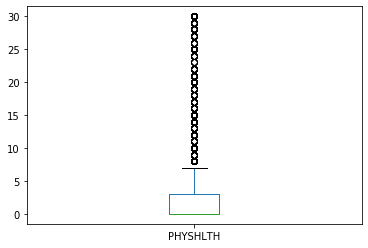

In [13]:
df.PHYSHLTH.plot.box();

In [14]:
df.PHYSHLTH.value_counts()

0.0     21296
30.0     2438
2.0      1993
1.0      1538
3.0      1187
5.0      1092
10.0      751
7.0       641
15.0      640
4.0       622
20.0      402
14.0      326
6.0       187
25.0      159
8.0        99
21.0       70
12.0       69
28.0       57
29.0       35
27.0       22
18.0       19
16.0       16
17.0       15
9.0        15
22.0       12
13.0       10
19.0       10
11.0        8
24.0        7
26.0        7
23.0        4
Name: PHYSHLTH, dtype: int64

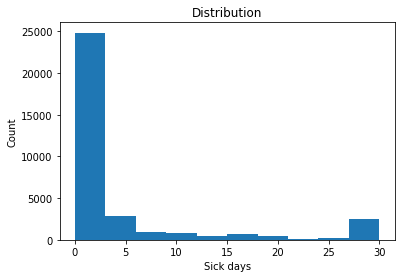

In [15]:
# graphic the distribution of data
x= df.PHYSHLTH

plt.hist(x)
plt.title('Distribution')
plt.xlabel('Sick days')
plt.ylabel('Count');

## 3. Generate a graphic that compares the average number of sick days for each state. 

In [16]:
# code to calculate the average number of sick days by state
df.groupby(['_STATE'])['PHYSHLTH'].mean()

_STATE
9.0     3.688562
34.0    4.380957
36.0    4.148030
Name: PHYSHLTH, dtype: float64

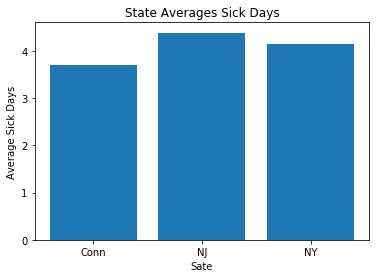

In [17]:
# code to graph those averages using matplotlib
y = df.groupby('_STATE').PHYSHLTH.mean()
x = ['Conn', 'NJ', 'NY']
plt.bar(x,y)
plt.title('State Averages Sick Days')
plt.xlabel('Sate')
plt.ylabel('Average Sick Days');

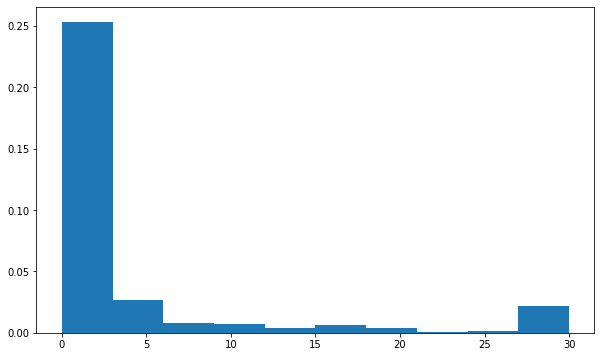

In [18]:
x = df[df['_STATE'] == 9].PHYSHLTH
fig, ax = plt.subplots(figsize=(10,6))
ax.hist(x, density=True);

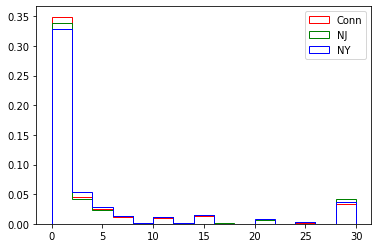

In [19]:
d1 = df[df['_STATE']==9].PHYSHLTH
d2 = df[df['_STATE']==34].PHYSHLTH
d3 = df[df['_STATE']==36].PHYSHLTH

fig, ax = plt.subplots()
ax.hist(d1, 15, ec='red', lw=1, histtype='step', label='Conn',density=True);
ax.hist(d2, 15, ec='green', lw=1, histtype='step', label='NJ',density=True);
ax.hist(d3, 15, ec='blue', lw=1, histtype='step', label='NY',density=True);
ax.legend(loc='upper right');
plt.show();

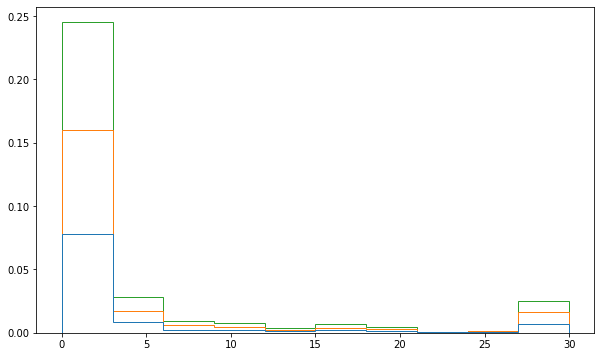

In [20]:
# graphic showing the histogram of data
#TRYING A DIFFERNET WAY DIDN"T WORK!
Conn = df[df['_STATE'] == 9].PHYSHLTH
NJ = df[df['_STATE'] == 34].PHYSHLTH
NY = df[df['_STATE'] == 36].PHYSHLTH
x = [Conn, NJ, NY]
fig, ax = plt.subplots(figsize=(10,6))
ax.hist(x, histtype='step', stacked=True, fill=False, density=True);

## 4. Turn the number of sick days into a classification of of chronically sick people.  

Chronically sick people account for a significant proportion of the costs for health insurers. If we can identify what leads people to be chronically sick, we can address them with specific treatments.



In [21]:
df['chronic'] = np.where(df['PHYSHLTH'] >= 15, 1, 0)

## 5. Create a graphic that compares the percentage of people labeled as 'sick' in each state. 

In [22]:
df.chronic.value_counts()

0    29834
1     3913
Name: chronic, dtype: int64

In [23]:
df.PHYSHLTH.isna().sum()

0

In [24]:
# code to calculate averages per state
df.groupby(['_STATE']).chronic.mean()

_STATE
9.0     0.103428
34.0    0.127335
36.0    0.115948
Name: chronic, dtype: float64

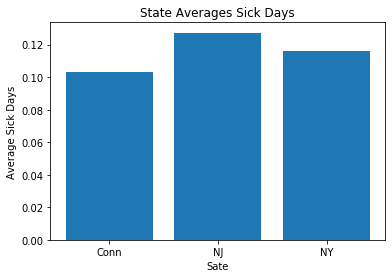

In [25]:
# create graphic to compare chronically sick by state
y = df.groupby('_STATE').chronic.mean()
x = ['Conn', 'NJ', 'NY']
plt.bar(x,y)
plt.title('State Averages Sick Days')
plt.xlabel('Sate')
plt.ylabel('Average Sick Days');

## 6. Independent Variables (categorical)

Does smoking affect the number of days people feel physically ill? 
Let's take the column `SMOKDAY2` and start to prepare it so that we can see how it is possibly correlated to `PHYSHLTH`. When cleaning this data you will find that many respondents were not asked that question. read the codebook to understand why, and use that information when cleaning up your data. I.E, you will need to process two columns in order to create a new column of smokers.

1. Clean up the values.
2. Calculate the descriptive statistics of the variable.
3. Generate a histogram for the variable.
4. Generate graphics that show how the responses to this variable might differ by state.
5. Generate a graphic that compares the physical health of the different groups of 'smokers'.

In [26]:
df.SMOKDAY2.value_counts().sum()

13468

In [27]:
df['smoking'] = np.where(df['SMOKE100']==2,3,df['SMOKDAY2'])
df['smoking'] = np.where(df['SMOKE100']==7,7,df['smoking'])
df['smoking'] = np.where(df['SMOKE100']==9,9,df['smoking'])

In [28]:
df[['SMOKDAY2', 'SMOKE100', 'smoking']].sample(10)

,SMOKDAY2,SMOKE100,smoking
298684,1.0,1.0,1.0
296845,3.0,1.0,3.0
52920,3.0,1.0,3.0
281734,NaN,2.0,3.0
51192,NaN,2.0,3.0
302194,NaN,2.0,3.0
277954,NaN,2.0,3.0
280152,NaN,2.0,3.0
299494,NaN,2.0,3.0
280087,2.0,1.0,2.0


In [29]:
df.groupby('_STATE').smoking.value_counts(normalize=True).mul(100)

_STATE  smoking
9.0     3.0        88.602537
        1.0         7.052243
        2.0         3.436220
        7.0         0.649286
        9.0         0.259714
34.0    3.0        86.722704
        1.0         8.143529
        2.0         4.338395
        7.0         0.668836
        9.0         0.126537
36.0    3.0        86.086494
        1.0         8.897554
        2.0         4.537398
        7.0         0.248139
        9.0         0.230415
Name: smoking, dtype: float64

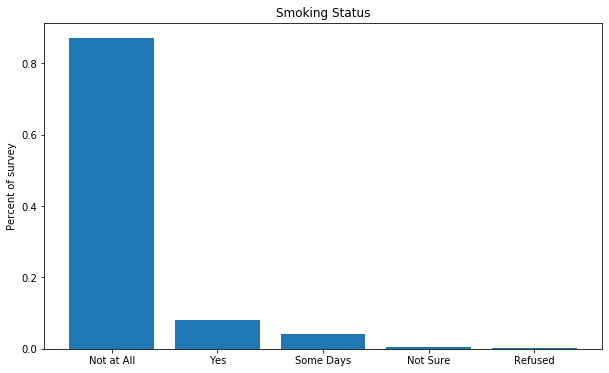

In [30]:
# code to graph those proportion of differen smoking groups using matplotlib
y=df.smoking.value_counts(normalize=True)
x=['Not at All', 'Yes', 'Some Days', 'Not Sure', 'Refused']
figure,ax =plt.subplots(figsize = (10,6))
plt.bar(x,y)
plt.title('Smoking Status')
plt.ylabel('Percent of survey');

In [31]:
# your code here

In [32]:
df[(df['smoking']!=9)&(df['_STATE']==9)].smoking.value_counts()

3.0    8870
1.0     706
2.0     344
7.0      65
Name: smoking, dtype: int64

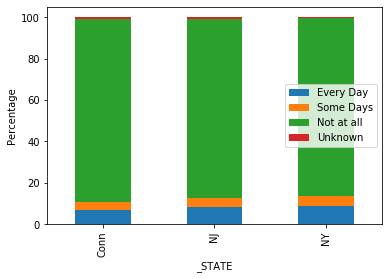

In [33]:
y = df[(df['smoking']!=9)].groupby('_STATE').smoking.value_counts(normalize=True).mul(100).unstack()
plot=y.plot.bar(lw=.35 ,stacked=True)
plot.set_xticklabels(('Conn', 'NJ', 'NY'))
plot.legend(('Every Day', 'Some Days', 'Not at all', 'Unknown'))
plot.set_ylabel('Percentage');

In [34]:
df[(df['smoking']!=9)&(df['_STATE']==9)].smoking.value_counts()

3.0    8870
1.0     706
2.0     344
7.0      65
Name: smoking, dtype: int64

In [35]:
# Conn = df[(df['smoking']!=9)&(df['_STATE']==9)].smoking.value_counts()
# NJ = df[(df['smoking']!=9)&(df['_STATE']==34)].smoking.value_counts()
# NY = df[(df['smoking']!=9)&(df['_STATE']==36)].smoking.value_counts()

# y = [Conn, NJ, NY]
# x= ['Conn', 'NJ', 'NY']
# figure,ax = plt.subplots(figsize=(10,6))

# plt.bar(x,y, stacked=True)

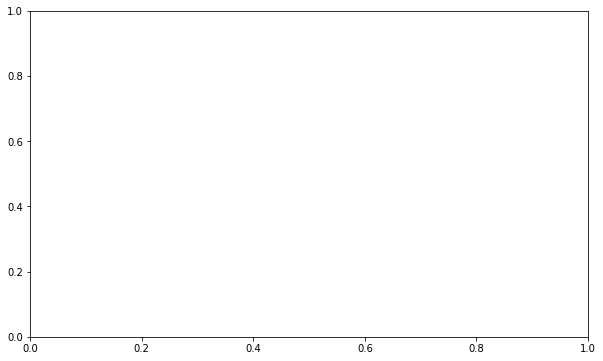

In [36]:
#graph showing the breakdown of smokers per state
Conn = df[(df['smoking']!=9)&(df['_STATE']==9)].smoking.value_counts()
NJ = df[(df['smoking']!=9)&(df['_STATE']==34)].smoking.value_counts()
NY= df[(df['smoking']!=9)&(df['_STATE']==36)].smoking.value_counts()

# y = [Conn, NJ, NY]
# x= ['Conn', 'NJ', 'NY']
figure,ax = plt.subplots(figsize=(10,6))


# p1 = plt.bar(Conn, Conn.index)
# p2 = plt.bar(NJ, NJ.index)

# plt.ylabel('Scores')
# plt.title('Scores by group and gender')
# plt.xticks(ind, ('G1', 'G2', 'G3', 'G4', 'G5'))
# plt.yticks(np.arange(0, 81, 10))
# plt.legend((p1[0], p2[0]), ('Men', 'Women'))

# plt.show()

In [37]:
df.PHYSHLTH.value_counts()

0.0     21296
30.0     2438
2.0      1993
1.0      1538
3.0      1187
5.0      1092
10.0      751
7.0       641
15.0      640
4.0       622
20.0      402
14.0      326
6.0       187
25.0      159
8.0        99
21.0       70
12.0       69
28.0       57
29.0       35
27.0       22
18.0       19
16.0       16
17.0       15
9.0        15
22.0       12
13.0       10
19.0       10
11.0        8
24.0        7
26.0        7
23.0        4
Name: PHYSHLTH, dtype: int64

In [38]:
df.smoking.isna().sum()

1388

In [39]:
df[df['smoking']!=9].groupby('smoking').PHYSHLTH.mean()

smoking
1.0    6.653007
2.0    6.295659
3.0    3.764435
7.0    3.868263
Name: PHYSHLTH, dtype: float64

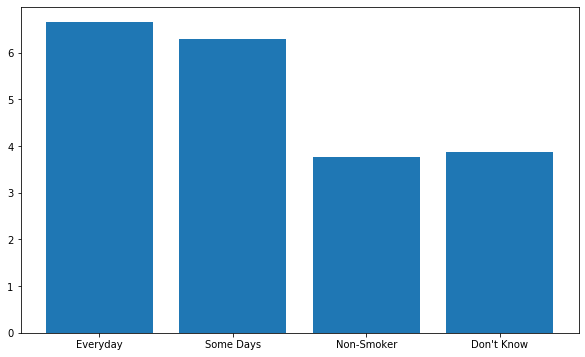

In [40]:
y=df[df['smoking']!=9].groupby('smoking').PHYSHLTH.mean()
x=['Everyday', 'Some Days', 'Non-Smoker', 'Don\'t Know']
figure,ax = plt.subplots(figsize=(10,6))
plt.bar(x,y);

In [41]:
# code to graph these averages sick days for each category of smoking status


## 7. Independent Variables (continuous):

Does the amount of days a person drinks affect the number of days they feel physically ill?
To investigate this, let's look at a continuous variable (ALCDAY5) and see how that might impact a person's health. 

1. Clean up the values.
2. Calculate the descriptive statistics of the variable.
3. Generate a histogram for the variable.
4. Generate graphics that show how the responses to this variable might differ by state.
5. Calculate the correlation coefficient between `PHYSHLTH` and `ALCDAY5`.
5. Generate a graphic that shows the possible relationship between `PHYSHLTH` and `ALCDAY5`.

In [42]:
alc_dict = {
    888:0, 777:np.nan, 999:np.nan}

df['alcohol'] = df['ALCDAY5'].replace(alc_dict)

In [43]:
def monthly(x):
    if x > 200:
        return x-200
    elif x>100:
        return min((x-100)*4.34,30)
    else:
        return x
df['alcohol'] = df['alcohol'].apply(monthly)

In [44]:
df.alcohol.describe()

count    31532.000000
mean         5.493546
std          8.421392
min          0.000000
25%          0.000000
50%          2.000000
75%          7.000000
max         30.000000
Name: alcohol, dtype: float64

In [45]:
# code here to clean up the ALCDAY5 responses


In [46]:
#descriptive statistics of cleaned data

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


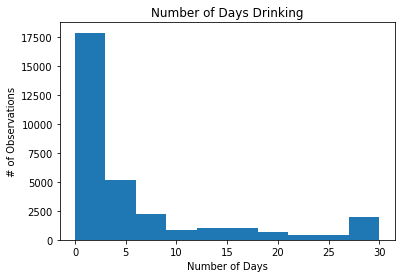

In [47]:
# graphic showing the histogram of data
fig,ax = plt.subplots()
ax.hist(df['alcohol'])
ax.set_xlabel('Number of Days')
ax.set_ylabel('# of Observations')
ax.set_title('Number of Days Drinking')
plt.show;

In [48]:
# code to calculate averages per state
df.groupby('_STATE').alcohol.mean()

_STATE
9.0     6.197798
34.0    5.056410
36.0    5.299345
Name: alcohol, dtype: float64

In [49]:
# Code to calculate correlation of between number of dirnks of number of days physically ill
df.PHYSHLTH.describe()

count    33747.000000
mean         4.085341
std          8.513293
min          0.000000
25%          0.000000
50%          0.000000
75%          3.000000
max         30.000000
Name: PHYSHLTH, dtype: float64

In [50]:
df.chronic.describe()

count    33747.000000
mean         0.115951
std          0.320171
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: chronic, dtype: float64

In [51]:
df.chronic.value_counts()

0    29834
1     3913
Name: chronic, dtype: int64

## 8. Statistical Inference


- Create a 95% confidence interval for the population mean of physically ill days. (3.9942, 4.085, 4.17583)

In [52]:
import scipy.stats as stats
#Min and Max of Confidence Interval - didn't work 
# stats.norm.interval(alpha = 0.05, loc=df.PHYSHLTH.mean())

In [53]:
def confidence(df):
    m=df.mean()
    sd=df.std()
    conf = 1.96*(sd/len(df)**.5) #1.96 is critical value in Z table for 95%
    print('Lower={}, Mean={}, Upper={}'.format(m-conf, m, m+conf))

In [54]:
confidence(df.PHYSHLTH)

Lower=3.99450951073477, Mean=4.085340919192817, Upper=4.176172327650865


-  Create a 95% confidence interval for the true proportion of chronically sick people. (0.112535, 0.119367)

In [55]:
#did it wrong should've used confidence intervals for Population Proportion
m=df.chronic.mean()
sd=df.chronic.std()
conf = 1.96*(sd/len(df.chronic)**.5)
print(m-conf, m, m+conf)

0.11253502741636087 0.11595104750051856 0.11936706758467625


In [56]:
confidence(df.chronic)

Lower=0.11253502741636087, Mean=0.11595104750051856, Upper=0.11936706758467625


## 9. Hypothesis Tests 

**For the follwing questions that require hypothesis tests, you must complete the following:**

*1. Write down the null and alternative hypothesis you are testing.* 

*2. Select the appropriate test and calculate the test statistic and P-values.*

*3. Determine the critical value for the 95% confidence interval.*

*4. Evaluate the test statistic agains the critical value.*

*5. Determine if you reject or fail to reject the null hypothesis and write a sentence explaining the results of your hypothesis test.*  

In [57]:
df.PHYSHLTH.describe()

count    33747.000000
mean         4.085341
std          8.513293
min          0.000000
25%          0.000000
50%          0.000000
75%          3.000000
max         30.000000
Name: PHYSHLTH, dtype: float64

In [58]:
df.drop(df[df['SEX'] == 9 ].index, inplace = True)

In [59]:
df.SEX.value_counts()

2.0    18911
1.0    14818
Name: SEX, dtype: int64

In [60]:
df.groupby('SEX').PHYSHLTH.describe()

,count,mean,std,min,25%,50%,75%,max
SEX,,,,,,,,
1.0,14818.0,3.700972,8.230261,0.0,0.0,0.0,2.0,30.0
2.0,18911.0,4.385278,8.715034,0.0,0.0,0.0,3.0,30.0


### The following questions are regarding the `PHYSHLTH` variable. 
- What is the probability of getting this sample mean for days physically ill, if the population mean is 4? (What is the probability of getting at least 4.085 compared to the population mean)
- Is there a statistically significant difference between men and women in the number of days a person feels phsyically ill?
- Perform a statistical test to determine if there statistically significant difference is physical health of people from the three states. 


# What is the probability of getting this sample mean for days physically ill, if the population mean is 4? (What is the probability of getting at least 4.085 compared to the population mean)

1)t-value = 1.84 and Probability

T_crit = 1.62

Null: Mean(sample) <= Pop(mean); Alternative: Mean(Sample)>Pop(Mean) 

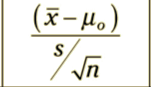

In [61]:
t_stats = (df.PHYSHLTH.mean()-4)/(df.PHYSHLTH.std()/(len(df.PHYSHLTH)**.5))
t_stats

1.82627731836135

In [62]:
t_crit= np.round(stats.t.ppf(1-.05/2, df=len(df.PHYSHLTH)-1),3)
t_crit

1.96

In [63]:
from scipy import stats

In [64]:
p_value = 1 - stats.t.cdf(t_stats, df=(len(df.PHYSHLTH)-1))
p_value

0.03390866769801115

In [65]:
stats.ttest_1samp(df['PHYSHLTH'],4)

Ttest_1sampResult(statistic=1.8262773183615, pvalue=0.06781733539599973)

WE FAIL TO REJECT OUR NULL HYPOTHESIS! Because T-statistics is lower than t_crit. And P_value is 

Is there a statistically significant difference between men and women in the number of days a person feels phsyically ill?

In [66]:
df_male = df[df['SEX']==1]
df_female = df[df['SEX']==2]

# Is there a statistically significant difference between men and women in the number of days a person feels phsyically ill?

2)T- value is 7.39, T-Crit is 1.962, and P-value is <0.00001 reject null hypothesis

T-test because no population STD

    Null: Men(avg_ill) = Women(avg_ill); 
    Alternative: Men(avg_ill) != Women(avg_ill)

In [67]:
stats.ttest_ind(df_male['PHYSHLTH'], df_female['PHYSHLTH'], equal_var=False)

Ttest_indResult(statistic=-7.384412969212337, pvalue=1.567871684086161e-13)

In [68]:
dof=len(df_male)+len(df_female)-2 #degrees of freedom
t_crit= np.round(stats.t.ppf(1-.05/2, df=dof),3) #to find the T critical value, and round to 3 significant digits
t_crit

1.96

    Reject null hypothesis because test statistics is larger than t_crit, and the result is significant at p < .05

# Perform a statistical test to determine if there statistically significant difference in physical health of people from the three states.

    1) Null: PHYSHLTH_Mean(Conn) = PHYSHLTH_mean(NJ) = PHYSHLTH_MEAN(NY)

       Alternative: PHYSHLTH_mean(Conn) != PHYSHLTH_mean(NJ) != PHYSHLTH_mean(NY)
   
    2) ANOVA Test because three means, F-crit is 3.0 

In [69]:
df['STATE'] = df['_STATE'].apply(lambda x: 'Conn' if x==9 else('NJ' if x==34 else('NY')))

In [70]:
df.STATE.value_counts()

NY      11873
NJ      11458
Conn    10398
Name: STATE, dtype: int64

In [71]:
df.groupby('_STATE').PHYSHLTH.mean()

_STATE
9.0     3.684555
34.0    4.380957
36.0    4.149078
Name: PHYSHLTH, dtype: float64

In [72]:
stats.f_oneway(df['PHYSHLTH'][df['STATE'] == 'Conn'],
                df['PHYSHLTH'][df['STATE'] == 'NJ'], 
                df['PHYSHLTH'][df['STATE'] == 'NY'])

F_onewayResult(statistic=18.78798131562152, pvalue=6.998830805800168e-09)

In [73]:
#Double check
from statsmodels.formula.api import ols
import statsmodels.api as sm
anova_state = ols('PHYSHLTH~STATE',data=df).fit()

In [74]:
anova_table = sm.stats.anova_lm(anova_state, type=2)
print(anova_table)

               df        sum_sq      mean_sq          F        PR(>F)
STATE         2.0  2.719741e+03  1359.870587  18.787981  6.998831e-09
Residual  33726.0  2.441082e+06    72.379814        NaN           NaN


    We reject our null hypothesis becaus our F test > F crit value. And our P-value is < 0.05

In [94]:
df.groupby('STATE').PHYSHLTH.describe()

,count,mean,std,min,25%,50%,75%,max
STATE,,,,,,,,
Conn,10398.0,3.684555,8.097946,0.0,0.0,0.0,2.0,30.0
NJ,11458.0,4.380957,8.923776,0.0,0.0,0.0,3.0,30.0
NY,11873.0,4.149078,8.446140,0.0,0.0,0.0,3.0,30.0


### The following questions are regarding the  `CHRONIC` variable.
- What is the probability of drawing this sample proportion if chronically true population proportion is 0.10?
- Is there a statistically significant difference in the percentage of men and women who are chronically sick?
- Perform a statistical test to determine if there statistically significant difference is physical health of people from the three states.

In [75]:
df.chronic.value_counts(normalize=True)[1]

0.11592398232974592

In [76]:
df.chronic.describe()

count    33729.000000
mean         0.115924
std          0.320138
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: chronic, dtype: float64

In [77]:
from statsmodels.stats.proportion import proportions_ztest
import numpy as np

# What is the probability of drawing this sample proportion if chronically true population proportion is 0.10?

    Null: P(sample) = P(population)
    Alternative: P(sample) != P(population)

    Is np, n(1-p)>=10?

    Population Proportion Equation
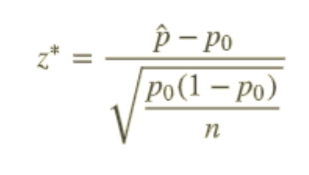

In [78]:
len(df.chronic)*df.chronic.value_counts(normalize=True)[1]

3910.0

In [79]:
len(df.chronic)*(1-(df.chronic.value_counts(normalize=True)[1]))

29819.0

In [80]:
z_star = (.1159-.1)/((.1*(1-.1))/33729)**.5
z_star

9.733692053891986

z-crit = 1.96

# Is there a statistically significant difference in the percentage of men and women who are chronically sick?

    Null: P(men) = P(Women)
    Alternative: P(men) != P(women)

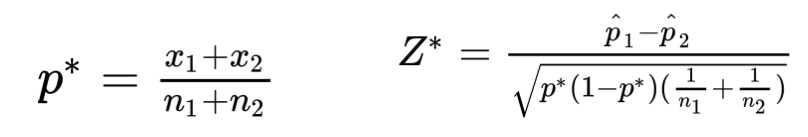

In [81]:
def p_star(first, second):
    x1x2=first.value_counts()[1]+second.value_counts()[1]
    n1n2 = first.value_counts().sum()+second.value_counts().sum()
    return (x1x2/n1n2)

def z_proportion(first, second):
    p = p_star(first,second)
#     print('p',p)
    p1=first.value_counts(normalize=True)[1]
#     print('p1',p1)
    n1=first.value_counts().sum()
#     print('n1',n1)
    p2=second.value_counts(normalize=True)[1]
#     print('p2',p2)
    n2 = second.value_counts().sum()
#     print('n2',n2)
    den = ((p*(1-p))*((1/n1)+(1/n2)))**.5
#     print('den', den)
    num = (p1-p2-0)
#     print('num',num)
    z = num/den
    return z

In [82]:
p_star(df_male.chronic, df_female.chronic)

0.11592398232974592

In [83]:
z_crit= np.round(stats.norm.ppf(1-.05/2),3)
z_crit

1.96

In [84]:
z_proportion(df_male.chronic, df_female.chronic)
p_value = 1 - stats.norm.cdf(abs(z_proportion(df_male.chronic, df_female.chronic)))
p_value

2.981637381438418e-09

In [85]:
abs(z_proportion(df_male.chronic, df_female.chronic))

5.817784400161378

Our Z score is higher than Z_crit meaning we reject null hypothesis

# Perform a statistical test to determine if there statistically significant difference in chronic physical health of people from the three states.

    Null: PHYSHLTH_Mean(Conn) = PHYSHLTH_mean(NJ) = PHYSHLTH_MEAN(NY)
    Alternative: PHYSHLTH_mean(Conn) != PHYSHLTH_mean(NJ) != PHYSHLTH_mean(NY)

In [86]:
df.groupby('STATE').chronic.mean()

STATE
Conn    0.103289
NJ      0.127335
NY      0.115977
Name: chronic, dtype: float64

In [87]:
df.groupby('STATE').chronic.value_counts(normalize=True)

STATE  chronic
Conn   0          0.896711
       1          0.103289
NJ     0          0.872665
       1          0.127335
NY     0          0.884023
       1          0.115977
Name: chronic, dtype: float64

In [88]:
stats.f_oneway(df['chronic'][df['STATE'] == 'Conn'],
               df['chronic'][df['STATE'] == 'NJ'], 
               df['chronic'][df['STATE'] == 'NY'])

F_onewayResult(statistic=15.389628061227361, pvalue=2.0864953963137357e-07)

In [89]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
# why can we use ols in this case?
anova_state = ols('chronic~STATE',data=df).fit()
anova_table = sm.stats.anova_lm(anova_state, type=2)
print(anova_table)

               df       sum_sq   mean_sq          F        PR(>F)
STATE         2.0     3.151835  1.575918  15.389628  2.086495e-07
Residual  33726.0  3453.585394  0.102401        NaN           NaN


In [90]:
chronic_state =  pd.crosstab(df['chronic'],[df['STATE']])
chronic_state

STATE,Conn,NJ,NY
chronic,,,
0,9324,9999,10496
1,1074,1459,1377


In [91]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2
# contingency table

stat, p, dof, expected = chi2_contingency(chronic_state)

print('dof=%d' % dof)
print(expected)
#interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f)' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
#interpret p-value
alpha= 1-prob
print('signigicance=%.3f, p=%.3f,' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else: 
    print('Independent (fail to reject)')

dof=2
[[ 9192.62243174 10129.74301047 10496.6345578 ]
 [ 1205.37756826  1328.25698953  1376.3654422 ]]
probability=0.950, critical=5.991, stat=30.754)
Dependent (reject H0)
signigicance=0.050, p=0.000,
Dependent (reject H0)


# 10. Independent Investigation

Now that you have invesitgated physical health and chronic sickness and their relationships with states and gender, you will conduct a similar investigation with variables of your choosing. 

Select a continuous dependent varaible and a binary dependent variable that you would like to investigate. Then select a categorical independent variable with at least 3 groups and for which you will test to see if the response to the independent variable affects outcomes of the dependent variable.

    Continuous Variable: MENTHLTH = "Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good?"

    Null: Mean_Men(mental) = Mean_Women(mental)
    Alternative: Mean_Men(mental) = Mean_Women(mental)

In [92]:
df.mental.describe()

AttributeError: 'DataFrame' object has no attribute 'mental'

In [ ]:
mnthlth_dict = {
    88:0, 77:np.nan, 99:np.nan}

df['mental'] = df['MENTHLTH'].replace(mnthlth_dict)

In [ ]:
df['mental'].dropna(inplace=True)

In [ ]:
df_male = df[df['SEX']==1]
df_female = df[df['SEX']==2]

In [ ]:
confidence(df.mental)

In [ ]:
t_stats = (df_male.mental.mean()-df_female.mental.mean())/(df_male.mental.std()/(len(df_male.mental)**.5))
t_stats

In [ ]:
dof=len(df_male)+len(df_female)-2 #degrees of freedom
t_crit= np.round(stats.t.ppf(1-.05/2, df=dof),3) #to find the T critical value, and round to 3 significant digits
t_crit

    Null: Mean_Conn(mental) = Mean_NJ(mental) = Mean_NY(mental)
    Alternative: Mean_Conn(mental) != Mean_NJ(mental) != Mean_NY(mental)

    F - Crit = 3.00

In [ ]:
stats.f_oneway(df['mental'][df['STATE'] == 'Conn'],
               df['mental'][df['STATE'] == 'NJ'], 
               df['mental'][df['STATE'] == 'NY'])

    Reject Null Hypothesis because F test is greater than F-Crit

For your continuous dependent variable perform the following:
  - Determine the sample mean and sample standard deviation
  - Create a confidence interval for a population mean.
  - Perform a two-sample test of means for gender.
  - Perform a one-way ANOVA using your categorical independent variable.

Select/create a binary variable from the survey questions as you dependent variable and perform the following:
  - Create a confidence interval for a population proportion.
  - Perform a two proportions z-test using gender.
  - Perform a Chi-Square test using your categorical independent variable.

In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
anova_season = ols('cnt~season_cat',data=data).fit()

    Binary Variable= DIFFDRES:Do you have difficulty dressing or bathing?

In [ ]:
#wrong because we didn't use population proportion
def confidence(df):
    m=df.mean()
    sd=df.std()
    conf = 1.96*(sd/len(df)**.5)
    print(m-conf, m, m+conf)

In [ ]:
confidence(df.DIFFDRES)

    Null: Proportion(male) = Proportion(female)
    Alternative: Proportion(male) != Proportion(female)

In [ ]:
def p_star(first, second):
    x1x2=first.value_counts()[1]+second.value_counts()[1]
    n1n2 = first.value_counts().sum()+second.value_counts().sum()
    return (x1x2/n1n2)

def z_proportion(first, second):
    p = p_star(first,second)
#     print('p',p)
    p1=first.value_counts(normalize=True)[1]
#     print('p1',p1)
    n1=first.value_counts().sum()
#     print('n1',n1)
    p2=second.value_counts(normalize=True)[1]
#     print('p2',p2)
    n2 = second.value_counts().sum()
#     print('n2',n2)
    den = ((p*(1-p))*((1/n1)+(1/n2)))**.5
#     print('den', den)
    num = (p1-p2-0)
#     print('num',num)
    z = num/den
    return z

In [ ]:
dress_dict= {7:np.nan, 9:np.nan}
df['DIFFDRES'] = df['DIFFDRES'].replace(dress_dict)

In [ ]:
z=z_proportion(df[df['SEX']==1].DIFFDRES, df[df['SEX']==2].DIFFDRES)
p_value = 1 - stats.norm.cdf(abs(z_proportion(df[df['SEX']==1].DIFFDRES, df[df['SEX']==2].DIFFDRES)))
print('z_value = {}, p_value={}'.format(z,p_value))

    Reject Null Hypothesis because Z-value > Z_crit (1.96) and p_value < 0.05

# Binary Variable

We want to see if there is a difference between healthcare coverage and chronic sickness

    HLTHCVR1: What is the primary source of your health care coverage? Is it...

    Null: Healthcare_cov = Chronic_health(proportion)
    Alternative: Healthcare_cov != Chronic_health(proportion)

In [ ]:
df.HLTHCVR1.value_counts()

In [ ]:
cvrg_dict= {8:0, 77:np.nan, 99:np.nan}
df['HLTHCVR1']=df['HLTHCVR1'].replace(cvrg_dict)

In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
df.groupby('chronic').HLTHCVR1.value_counts()

In [ ]:
df[df['chronic']==1]

In [ ]:
chronic_hlthcvr =  pd.crosstab([df['chronic']],[df['HLTHCVR1']])

In [ ]:
chronic_hlthcvr

In [ ]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2
# contingency table

stat, p, dof, expected = chi2_contingency(chronic_hlthcvr)

print('dof=%d' % dof)
print(expected)
#interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f)' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
#interpret p-value
alpha= 1-prob
print('signigicance=%.3f, p=%.3f,' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else: 
    print('Independent (fail to reject)')